In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  

--2020-06-06 06:43:31--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  94.0MB/s    in 0.7s    

2020-06-06 06:43:32 (94.0 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
import os
import zipfile

In [ ]:
path='/tmp/cats_dogs'
zip_file=zipfile.ZipFile('/tmp/cats_and_dogs_filtered.zip')
zip_file.extractall(path)
zip_file.close()

In [ ]:
filtered=os.path.join(path,'cats_and_dogs_filtered')

In [5]:
os.listdir(filtered)

['train', 'vectorize.py', 'validation']

In [ ]:
train_path=os.path.join(filtered,'train')
test_path=os.path.join(filtered,'validation')

In [7]:
os.listdir(train_path)

['cats', 'dogs']

In [ ]:
### Lets take a sample image
sample_folder=os.path.join(train_path,'dogs')
sample_file=os.path.join(sample_folder,os.listdir(sample_folder)[56])

In [9]:
sample_file

'/tmp/cats_dogs/cats_and_dogs_filtered/train/dogs/dog.176.jpg'

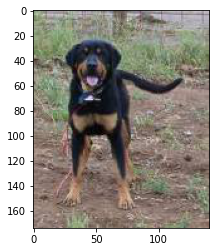

In [10]:
sample_image=plt.imread(sample_file)
plt.imshow(sample_image)

In [ ]:
### Lets create data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen=ImageDataGenerator(rescale=1/255.0)
train_gen=image_gen.flow_from_directory(train_path,
                                        target_size=(150,150),
                                        class_mode='binary',
                                        shuffle=True,
                                        batch_size=20)
test_gen=image_gen.flow_from_directory(test_path,
                                       target_size=(150,150),
                                       class_mode='binary',
                                       batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop

In [58]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='VALID',input_shape=(150,150,3),activation=tf.nn.relu))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=256,activation=tf.nn.relu))
model.add(Dense(units=1,activation=tf.nn.sigmoid))
rmsprop=RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss=keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 73, 73, 64)        8256      
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 35, 35, 128)       32896     
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 17, 17, 128)     

In [59]:
model.fit(train_gen,epochs=100,steps_per_epoch=100,validation_data=(test_gen),validation_steps=50)

Epoch 1/100
100/100 [==============================] - 9s 90ms/step - loss: 0.6929 - accuracy: 0.5285 - val_loss: 0.7343 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6652 - accuracy: 0.5985 - val_loss: 0.6411 - val_accuracy: 0.6440
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6302 - accuracy: 0.6515 - val_loss: 0.6389 - val_accuracy: 0.5950
Epoch 4/100
100/100 [==============================] - 9s 86ms/step - loss: 0.6012 - accuracy: 0.6775 - val_loss: 0.5942 - val_accuracy: 0.6870
Epoch 5/100
100/100 [==============================] - 9s 87ms/step - loss: 0.5746 - accuracy: 0.7135 - val_loss: 0.5885 - val_accuracy: 0.6720
Epoch 6/100
100/100 [==============================] - 9s 86ms/step - loss: 0.5381 - accuracy: 0.7350 - val_loss: 0.5611 - val_accuracy: 0.7150
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 0.5115 - accuracy: 0.7445 - val_loss: 0.5537 - val_accuracy:

In [ ]:
loss=model.history.history['loss']
val_loss=model.history.history['val_loss']
acc=model.history.history['accuracy']
val_acc=model.history.history['val_accuracy']

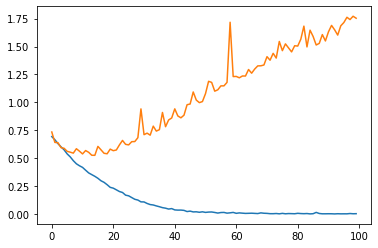

In [61]:
plt.plot(loss)
plt.plot(val_loss)

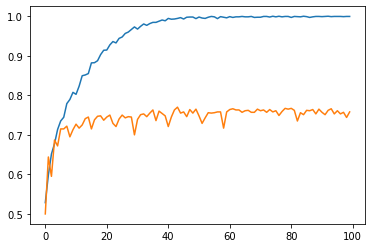

In [62]:
plt.plot(acc)
plt.plot(val_acc)

In [63]:
train_path,test_path


('/tmp/cats_dogs/cats_and_dogs_filtered/train',
 '/tmp/cats_dogs/cats_and_dogs_filtered/validation')

In [64]:
#### Now we will perform the same using Data augmentation
aug_gen=ImageDataGenerator(rescale=1/255.0,
                           rotation_range=40,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True,
                           fill_mode='nearest')
aug_train_gen=aug_gen.flow_from_directory(train_path,
                                          target_size=(150,150),
                                          class_mode='binary',
                                          batch_size=20,shuffle=True)

test_datagen = ImageDataGenerator(rescale=1./255)
aug_test_gen=test_datagen.flow_from_directory(test_path,
                                         target_size=(150,150),
                                         class_mode='binary',
                                         batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='VALID',input_shape=(150,150,3),activation=tf.nn.relu))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(units=512,activation=tf.nn.relu))
model.add(Dense(units=1))
rmsprop=RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [77]:
history=model.fit(aug_train_gen,epochs=100,steps_per_epoch=100,validation_data=(aug_test_gen),validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6933 - accuracy: 0.5055 - val_loss: 0.6853 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6868 - accuracy: 0.5115 - val_loss: 0.6649 - val_accuracy: 0.5070
Epoch 3/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6791 - accuracy: 0.5280 - val_loss: 0.6509 - val_accuracy: 0.5550
Epoch 4/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6663 - accuracy: 0.5640 - val_loss: 0.6407 - val_accuracy: 0.6560
Epoch 5/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6545 - accuracy: 0.5850 - val_loss: 0.6215 - val_accuracy: 0.6070
Epoch 6/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6388 - accuracy: 0.6120 - val_loss: 0.5909 - val_accuracy: 0.6700
Epoch 7/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6259 - accuracy: 0.6285 - val_loss: 0.6318 -

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

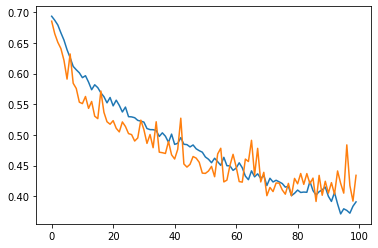

In [79]:
plt.plot(loss)
plt.plot(val_loss)

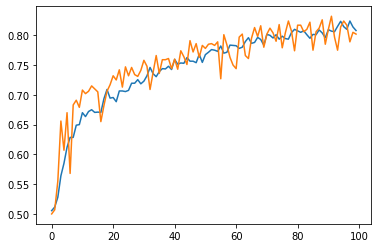

In [80]:
plt.plot(acc)
plt.plot(val_acc)

In [81]:
model=keras.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='VALID',input_shape=(150,150,3),activation=tf.nn.relu))
model.add((MaxPooling2D(pool_size=(2,2))))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='VALID',activation=tf.nn.relu))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=512,activation=tf.nn.relu))
model.add(Dense(units=1,activation=tf.nn.sigmoid))
rmsprop=RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss=keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 15, 15, 128)     

In [82]:
history=model.fit(aug_train_gen,epochs=100,steps_per_epoch=100,validation_data=(aug_test_gen),validation_steps=50)

Epoch 1/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6952 - accuracy: 0.5225 - val_loss: 0.6907 - val_accuracy: 0.5090
Epoch 2/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6871 - accuracy: 0.5540 - val_loss: 0.6672 - val_accuracy: 0.6180
Epoch 3/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6719 - accuracy: 0.5670 - val_loss: 0.6841 - val_accuracy: 0.5430
Epoch 4/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6627 - accuracy: 0.6015 - val_loss: 0.6245 - val_accuracy: 0.6450
Epoch 5/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6488 - accuracy: 0.6205 - val_loss: 0.6081 - val_accuracy: 0.6540
Epoch 6/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6315 - accuracy: 0.6330 - val_loss: 0.6292 - val_accuracy: 0.6060
Epoch 7/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6138 - accuracy: 0.6620 - val_loss: 0.5779 -

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

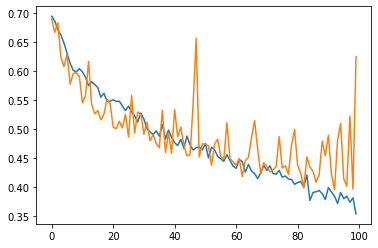

In [84]:
plt.plot(loss)
plt.plot(val_loss)

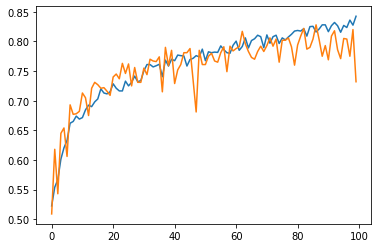

In [85]:
plt.plot(acc)
plt.plot(val_acc)